In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

# Assuming an intervention, what does the birth rate of moose need to be to have a positive trend in Northeastern Minnesotan moose population?

The following data collected from the Minnesota DNR.

To make this model the following assumptions were made:

    -The birth rate of the moose remains constant

The parameters we took in for this model/simulation were:

    -


In [2]:
population = [8160, 8840, 6860, 7890, 7840, 5700, 4900, 4230, 2760, 4350, 3450, 4020, 3710, 3030];

In [3]:
years = range(2005,2019);

We then put the data into the TimeSeries, so it is easier to work with.

In [4]:
population_series = TimeSeries(population, index = years, dtype = float)

,values
2005,8160.0
2006,8840.0
2007,6860.0
2008,7890.0
2009,7840.0
2010,5700.0
2011,4900.0
2012,4230.0
2013,2760.0
2014,4350.0


Create a fucntion to calculate the average birth rate over time.  This was calculated using the assumption of a 25% death rate.  This value is from a New York Times article: https://www.nytimes.com/2013/10/15/science/earth/something-is-killing-off-the-moose.html

In [5]:
def birth_rate(population):
    sum=0
    #print(population[0])
    for i in range(13):
        birth = population[i+1]/population[i]-0.75
        sum = sum + birth
        #print(sum)
    avgbirth = sum/14
    return avgbirth
#print('average birth rate =', birth_rate(population))
avgbirth = birth_rate(population)
print(avgbirth)

0.18782875308272756


Create a function for the line of best fit to show the trend of the moose population over time.

In [6]:
def f(years):
    t = TimeSeries()
    for x in (0, 2050):
        y = (-454.286*x) + 919206
        t[x] = y
    return t

Create a scatter plot of the past data by year and plot a line of best fit for the data, which shows the overall negative trend.

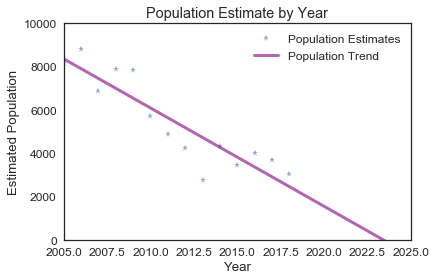

In [7]:
def population_graph(series):
    plot(series,'*', label='Population Estimates')
    plot(f(years), "purple", label='Population Trend')
    decorate(xlabel = 'Year',
           ylabel = 'Estimated Population',
           title = 'Population Estimate by Year')
    plt.ylim([0, 10000]);
    plt.xlim([2005, 2025]);
    
population_graph(population_series)

Create a SweepSeries for values for change in death rate.  This will allow us to sweep death rates to determine how 

In [8]:
a = 0.08
b = 0.25
c = 5

death_rate_sweep = linspace(a, b, c)

array([0.08  , 0.1225, 0.165 , 0.2075, 0.25  ])

We then created a linear line of best fit showing the general trend over time.  First we define a function that creates an array of values forming a line of best fit.  Then we plot these values on a plot.

In [9]:
time_initial = 2018;
moose = population_series[time_initial];
birth_rate = avgbirth;
death_rate = death_rate_sweep;
duration = 10;

In [10]:
system = System(time_initial=time_initial,
               moose=moose,
               birth_rate=birth_rate,
               #death_rate=death_rate,
               duration=duration)

,values
time_initial,2018.000000
moose,3030.000000
birth_rate,0.187829
duration,10.000000


In [11]:
print(death_rate_sweep[0])

0.08


In [12]:
def update_func(pop, t, system, i, death_rate_sweep):
    #net_growth = (system.birth_rate - death_rate_sweep[i]) * pop
    net_growth = (system.birth_rate - death_rate_sweep[i]) * pop
    return pop + net_growth

In [13]:
def run_simulation(system, update_func, i):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    #for i in range(c):
    results[i] = TimeSeries()
    results[system.time_initial] = system.moose
    
    for t in linrange(system.time_initial, system.time_initial + system.duration):
        results[t+1] = update_func(results[t], t, system, i, death_rate_sweep)
        
    return results

In [14]:
#def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.time_initial] = system.moose
    
    for t in linrange(system.time_initial, system.time_initial + system.duration):
        results[t+1] = update_func(results[t], t, system)
        
    return results

IndentationError: unexpected indent (<ipython-input-14-e18ec91a4b85>, line 2)

In [ ]:
for i in range(c):
    results = run_simulation(system, update_func, i)

In [ ]:
def plot_sim()
    plot run_simulation

Simulate the upcoming years assuming no intervention.

In [ ]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [ ]:
results = run_simulation(system, update_func1)
plot_results(census, un, results, 'Proportional model, factored')

In [ ]:
#plot predition and initial data

In [ ]:
#def plot_all_sim(system, update_function, iterations):
   # for i in range(iterations):
        #results = simulation(system, update_function)
        #plot(results, )


The results of the model are

In [30]:
death = linspace(0.08, 0.25, 5)

array([0.08  , 0.1225, 0.165 , 0.2075, 0.25  ])

In [16]:
def update_func(pop, t, system, i, death_rate_sweep, death):
    #net_growth = (system.birth_rate - death_rate_sweep[i]) * pop
    #net_growth = (system.birth_rate - death_rate_sweep[i]) * pop
    net_growth = ((system.birth_rate - death[i]) * pop)
    return pop + net_growth

In [17]:
def run_simulation(system, update_func, death):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    #for i in range(c):
    results = TimeSeries()
    results[system.time_initial] = system.moose
    
    for t in linrange(system.time_initial, system.time_initial + system.duration):
        results[t+1] = update_func(results[t], t, system, i, death_rate_sweep, death)
        
    return results

In [40]:
sweep = SweepSeries()

for i in range(5):
    death_rate_sim = run_simulation(system, update_func, death)
    sweep[death] = death_rate_sim

ValueError: [0.08   0.1225 0.165  0.2075 0.25  ] not contained in the index

In [18]:
death_rate = linspace(0.08, 0.25, 5)
for death in death_rate:
    print(death)

0.08
0.1225
0.16499999999999998
0.20750000000000002
0.25


In [19]:
sweep = SweepSeries()

for death in death_rate:
    death_rate_sim = run_simulation(system, update_func, death)
    sweep[death] = death_rate_sim

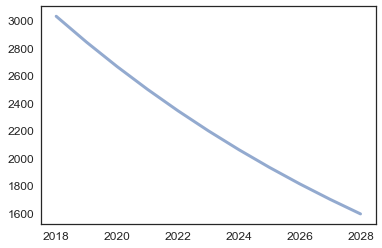

In [20]:
plot(sweep[death])

In [25]:
print(sweep[death])
#delete first value in sweep series.
#data type object
#plot year vs population
#sweep-1 only does population values



2018    3030.000000
2019    2841.621122
2020    2664.953993
2021    2499.270481
2022    2343.887719
2023    2198.165296
2024    2061.502619
2025    1933.336431
2026    1813.138494
2027    1700.413413
2028    1594.696591
dtype: float64


In [37]:
print(death[0])

0.08


In [68]:
death_rate = linspace(0.08, 0.25, 5)
drArray = TimeSeries()
num = 0
for temp in death_rate:
    drArray[num] = temp
    num += 1
    
print(drArray)

0    0.0800
1    0.1225
2    0.1650
3    0.2075
4    0.2500
dtype: float64


In [69]:
def update_func(pop, t, system, i, deathrate):
    net_growth = ((system.birth_rate - deathrate) * pop)
    return pop + net_growth

In [70]:
def run_simulation(system, update_func, drArray):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    #for i in range(c):
    results = TimeSeries()
    results[system.time_initial] = system.moose
    
    for t in linrange(system.time_initial, system.time_initial + system.duration):
        results[t+1] = update_func(results[t], t, system, i, drArray)
        
    return results

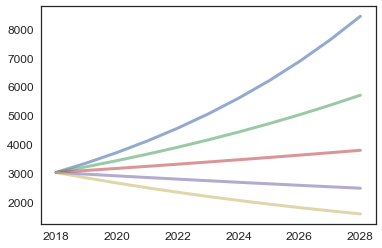

In [75]:
for i in range(0, 5):
    plot(run_simulation(system, update_func, drArray[i]))